In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df.head()


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [88]:
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_genres = merged[['movie_title','genres', 'tomatometer_rating', 'domestic_gross']].copy()

In [5]:
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


In [6]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2149 non-null   object 
 1   genres              2149 non-null   object 
 2   tomatometer_rating  2148 non-null   float64
 3   domestic_gross      2137 non-null   float64
dtypes: float64(2), object(2)
memory usage: 83.9+ KB


In [7]:
df_rating_genres.dropna(inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


In [8]:
df_rating_genres.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


In [9]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2063 non-null   object 
 1   genres              2063 non-null   object 
 2   tomatometer_rating  2063 non-null   float64
 3   domestic_gross      2063 non-null   float64
dtypes: float64(2), object(2)
memory usage: 80.6+ KB


In [89]:
df_sorted = df_rating_genres.sort_values('domestic_gross', ascending=False)
df_sorted

,movie_title,genres,tomatometer_rating,domestic_gross
343,Black Panther,Action & Adventure,96.0,700100000.0
343,Black Panther,Drama,96.0,700100000.0
343,Black Panther,Science Fiction & Fantasy,96.0,700100000.0
283,Avengers: Infinity War,Science Fiction & Fantasy,85.0,678800000.0
283,Avengers: Infinity War,Action & Adventure,85.0,678800000.0
...,...,...,...,...
863,Into the White,Action & Adventure,45.0,700.0
120,2:22,Mystery & Suspense,22.0,400.0
120,2:22,Drama,22.0,400.0
1507,Storage 24,Science Fiction & Fantasy,42.0,100.0


,movie_title,genres,tomatometer_rating,domestic_gross
343,Black Panther,"Action & Adventure, Drama, Science Fiction & F...",96.0,700100000.0
283,Avengers: Infinity War,"Action & Adventure, Science Fiction & Fantasy",85.0,678800000.0
923,Jurassic World,"Action & Adventure, Mystery & Suspense, Scienc...",70.0,652300000.0
1096,Marvel's The Avengers,"Action & Adventure, Science Fiction & Fantasy",92.0,623400000.0
1496,Star Wars: The Last Jedi,"Action & Adventure, Drama, Science Fiction & F...",90.0,620200000.0
...,...,...,...,...
267,Jackpot,Action & Adventure,59.0,800.0
238,Amityville: The Awakening,"Horror, Mystery & Suspense",30.0,700.0
863,Into the White,"Action & Adventure, Art House & International,...",45.0,700.0
120,2:22,"Drama, Mystery & Suspense",22.0,400.0


In [13]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.split(',', expand = False)

df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,[Comedy],87.0,4000000.0
2,Going the Distance,"[Comedy, Romance]",54.0,17800000.0
5,The Silence,"[Horror, Mystery & Suspense]",30.0,100000.0
7,Gone,[Mystery & Suspense],12.0,11700000.0
8,Fireflies in the Garden,[Drama],22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"[Art House & International, Comedy, Drama]",92.0,3100000.0
2145,Zombeavers,"[Action & Adventure, Comedy, Horror]",69.0,14900.0
2146,Zookeeper,"[Comedy, Romance]",14.0,80400000.0
2147,Zoolander 2,[Comedy],22.0,28800000.0


In [14]:
df_rating_genres = df_rating_genres.explode('genres')
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,Comedy,54.0,17800000.0
2,Going the Distance,Romance,54.0,17800000.0
5,The Silence,Horror,30.0,100000.0
5,The Silence,Mystery & Suspense,30.0,100000.0
...,...,...,...,...
2146,Zookeeper,Romance,14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0
2148,Zootopia,Action & Adventure,98.0,341300000.0
2148,Zootopia,Animation,98.0,341300000.0


In [15]:
df_rating_genres.dtypes

movie_title            object
genres                 object
tomatometer_rating    float64
domestic_gross        float64
dtype: object

In [16]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.strip()

In [17]:
df_rating_genres['genres'].value_counts() #18

Drama                        1145
Comedy                        632
Action & Adventure            496
Mystery & Suspense            403
Art House & International     249
Science Fiction & Fantasy     244
Romance                       175
Horror                        171
Documentary                   140
Kids & Family                 126
Animation                     116
Special Interest               89
Musical & Performing Arts      61
Sports & Fitness               21
Western                        19
Classics                       12
Television                     10
Faith & Spirituality            6
Gay & Lesbian                   1
Cult Movies                     1
Anime & Manga                   1
Name: genres, dtype: int64

In [19]:
df_comedy = df_rating_genres.loc[df_rating_genres['genres'] == 'Comedy']
df_romance = df_rating_genres.loc[df_rating_genres['genres'] == 'Romance']
df_horror = df_rating_genres.loc[df_rating_genres['genres'] == 'Horror']
df_mystery_suspence = df_rating_genres.loc[df_rating_genres['genres'] == 'Mystery & Suspense']
df_action_adventure = df_rating_genres.loc[df_rating_genres['genres'] == 'Action & Adventure']
df_animation = df_rating_genres.loc[df_rating_genres['genres'] == 'Animation']
df_art = df_rating_genres.loc[df_rating_genres['genres'] == 'Art House & International']
df_drama = df_rating_genres.loc[df_rating_genres['genres'] == 'Drama']
df_music = df_rating_genres.loc[df_rating_genres['genres'] == 'Musical & Performing Arts']
df_special = df_rating_genres.loc[df_rating_genres['genres'] == 'Special Interest']
df_doc = df_rating_genres.loc[df_rating_genres['genres'] == 'Documentary']
df_sports = df_rating_genres.loc[df_rating_genres['genres'] == 'Sports & Fitness']
df_family = df_rating_genres.loc[df_rating_genres['genres'] == 'Kids & Family']
df_science_fict = df_rating_genres.loc[df_rating_genres['genres'] == 'Science Fiction & Fantasy']
df_west = df_rating_genres.loc[df_rating_genres['genres'] == 'Western']
df_classics = df_rating_genres.loc[df_rating_genres['genres'] == 'Classics']
df_tv = df_rating_genres.loc[df_rating_genres['genres'] == 'Television']
df_faith = df_rating_genres.loc[df_rating_genres['genres'] == 'Faith & Spirituality']


In [90]:
round(df_comedy['domestic_gross'].mean())

42142872

In [91]:
round(df_comedy['tomatometer_rating'].mean())

55

In [23]:
#mean of the comedy gross profit 
y_comedy = round(df_comedy['domestic_gross'].mean())
y_drama = round(df_drama['domestic_gross'].mean())
y_romance = round(df_romance['domestic_gross'].mean())
y_horror = round(df_horror['domestic_gross'].mean())
y_mystery = round(df_mystery_suspence['domestic_gross'].mean())
y_action_adventure = round(df_action_adventure['domestic_gross'].mean())
y_animation = round(df_animation['domestic_gross'].mean())
y_art = round(df_art['domestic_gross'].mean())
y_music = round(df_music['domestic_gross'].mean())
y_special = round(df_special['domestic_gross'].mean())
y_doc = round(df_doc['domestic_gross'].mean())
y_sports = round(df_sports['domestic_gross'].mean())
y_family = round(df_family['domestic_gross'].mean())
y_science = round(df_science_fict['domestic_gross'].mean())
y_west = round(df_west['domestic_gross'].mean())
y_classics = round(df_classics['domestic_gross'].mean())
y_tv = round(df_tv['domestic_gross'].mean())
y_faith = round(df_faith['domestic_gross'].mean())

In [24]:
#mean of the comedy genre tomato ratings
x_comedy = round(df_comedy['tomatometer_rating'].mean())
x_romance = round(df_romance['tomatometer_rating'].mean())
x_horror = round(df_horror['tomatometer_rating'].mean())
x_mystery = round(df_mystery_suspence['tomatometer_rating'].mean())
x_action_adventure = round(df_action_adventure['tomatometer_rating'].mean())
x_animation = round(df_animation['tomatometer_rating'].mean())
x_art = round(df_art['tomatometer_rating'].mean())
x_drama = round(df_drama['tomatometer_rating'].mean())
x_music = round(df_music['tomatometer_rating'].mean())
x_special = round(df_special['tomatometer_rating'].mean())
x_doc = round(df_doc['tomatometer_rating'].mean())
x_sports = round(df_sports['tomatometer_rating'].mean())
x_family = round(df_family['tomatometer_rating'].mean())
x_science = round(df_science_fict['tomatometer_rating'].mean())
x_west = round(df_west['tomatometer_rating'].mean())
x_classics = round(df_classics['tomatometer_rating'].mean())
x_tv = round(df_tv['tomatometer_rating'].mean())
x_faith = round(df_faith['tomatometer_rating'].mean())


AttributeError: 'PathCollection' object has no property 'palette'

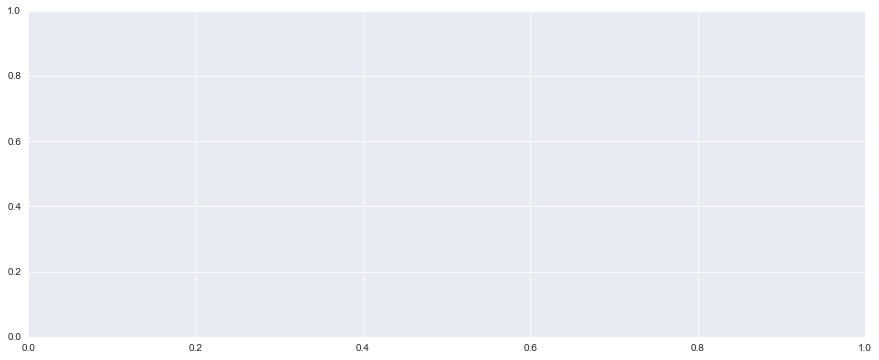

In [98]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x_comedy,y_comedy, palette=["red"])
ax.scatter(x_romance,y_romance)
ax.scatter(x_horror,y_horror)
ax.scatter(x_mystery,y_mystery)
ax.scatter(x_action_adventure,y_action_adventure)
ax.scatter(x_animation,y_animation)
ax.scatter(x_art,y_art)
ax.scatter(x_drama,y_drama)
#ax.scatter(x_music,y_music)
#ax.scatter(x_special,y_special)
#ax.scatter(x_doc,y_doc)
#ax.scatter(x_sports,y_sports)
#ax.scatter(x_family,y_family)
#ax.scatter(x_science,y_science)
#ax.scatter(x_west,y_west)
#ax.scatter(x_classics,y_classics)
#ax.scatter(x_tv,y_tv)
#ax.scatter(x_faith,y_faith)

ax.legend(['Comedy', 'romance', 'horror', 'Mystery', 'Action & Adventure', 'Animation',
          'Art', 'Drama', 'Music', 'Special', 'Documentary', 'Sports', 'Family', 'Science',
          'Western', 'Classics', 'TV', 'Faith'])

ax.set_xlabel('Mean Tomato Ratings')
ax.set_ylabel('Mean Gross Profit')
ax.set_title('Average Ratings and Gross Profit per Genre')
ax.set_facecolor('lightgrey')

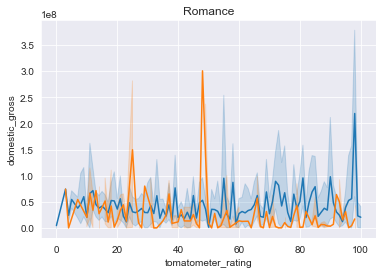

In [54]:
sns.set_style('darkgrid')
sns.lineplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross").set(title='Comedy')
sns.lineplot(data=df_romance, x="tomatometer_rating", y="domestic_gross").set(title='Romance')

[Text(0.5, 1.0, 'Faith')]

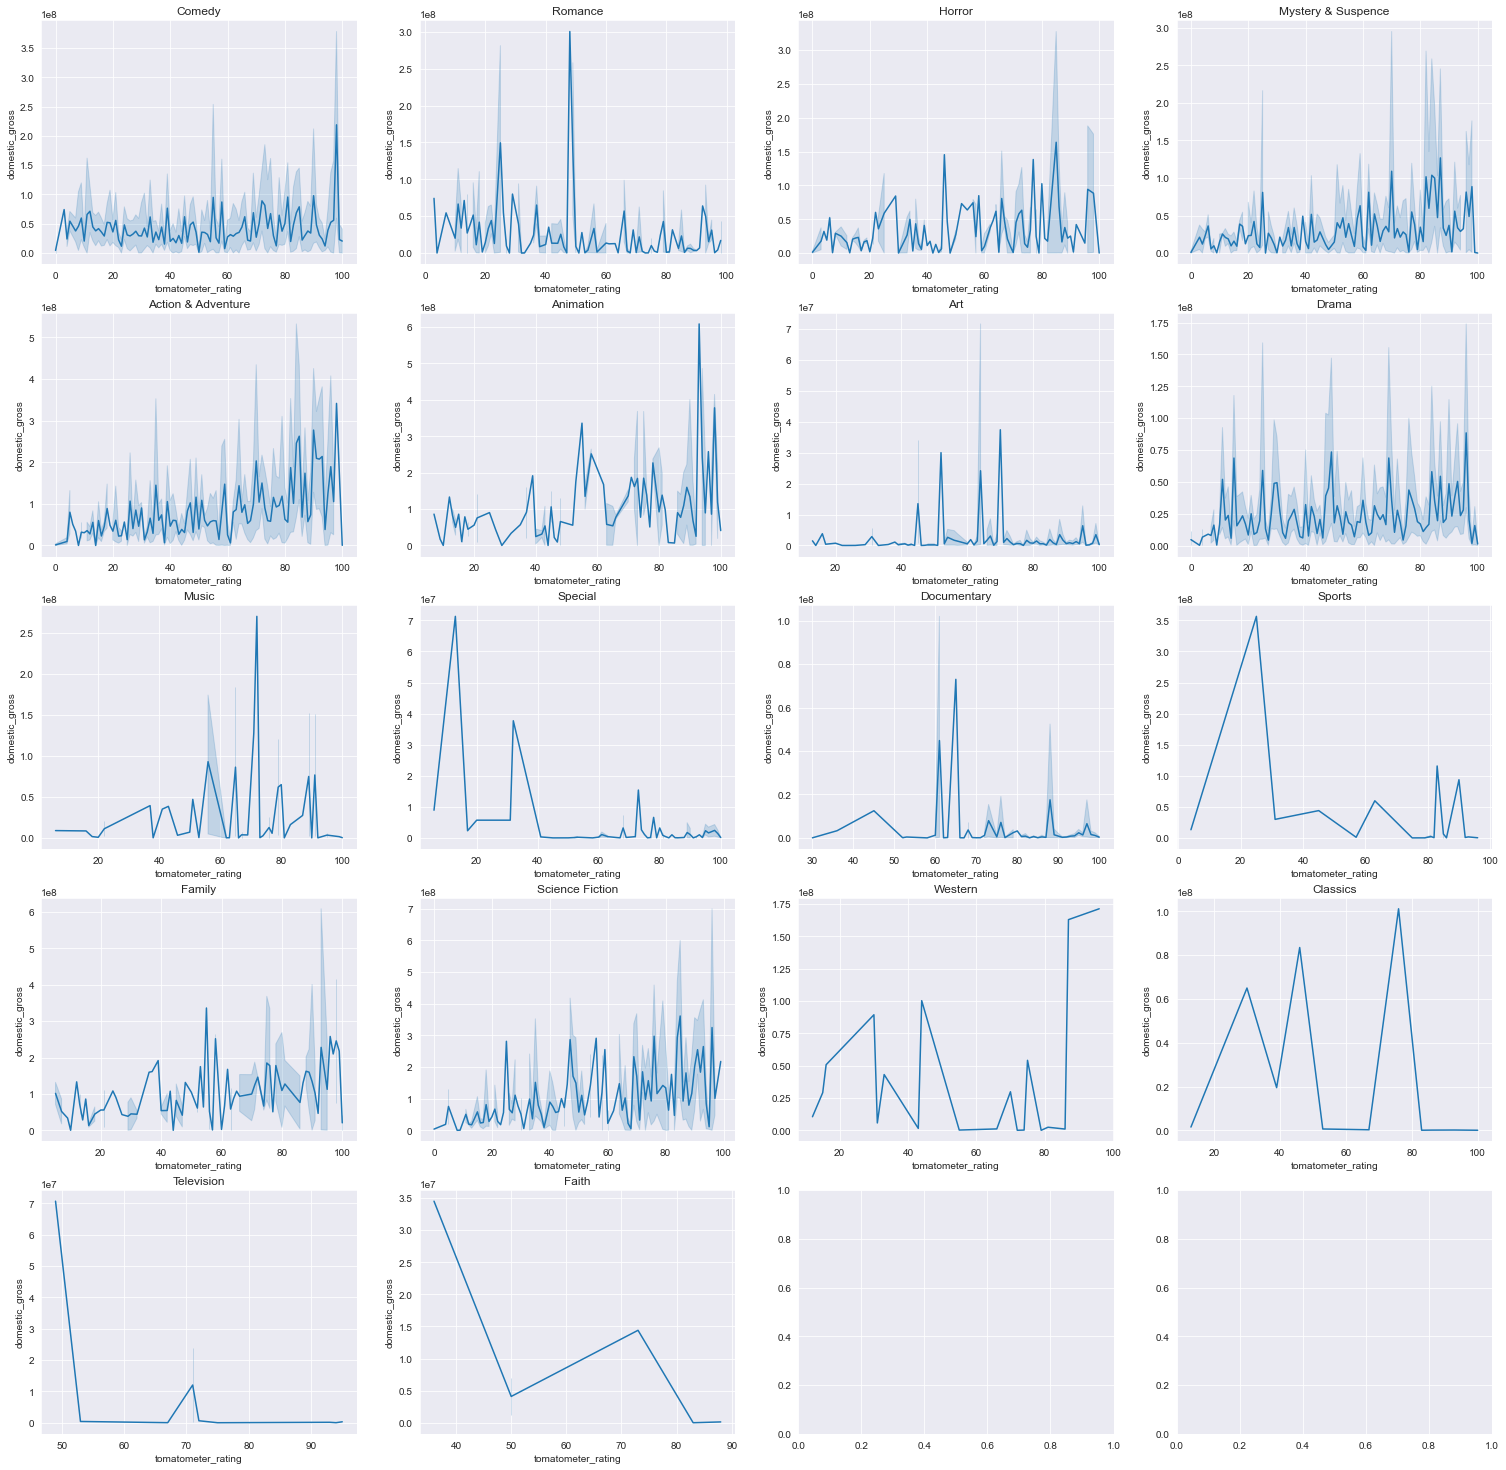

In [81]:
fig, axes =plt.subplots(nrows=5,ncols=4, figsize =(26,26))
sns.lineplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross", ax=axes[0][0]).set(title='Comedy')
sns.lineplot(data=df_romance, x="tomatometer_rating", y="domestic_gross", ax=axes[0][1]).set(title='Romance')
sns.lineplot(data=df_horror, x="tomatometer_rating", y="domestic_gross", ax=axes[0][2]).set(title='Horror')
sns.lineplot(data=df_mystery_suspence, x="tomatometer_rating", y="domestic_gross", ax=axes[0][3]).set(title='Mystery & Suspence')
sns.lineplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=axes[1][0]).set(title='Action & Adventure')
sns.lineplot(data=df_animation, x="tomatometer_rating", y="domestic_gross", ax=axes[1][1]).set(title='Animation')
sns.lineplot(data=df_art, x="tomatometer_rating", y="domestic_gross", ax=axes[1][2]).set(title='Art')
sns.lineplot(data=df_drama, x="tomatometer_rating", y="domestic_gross", ax=axes[1][3]).set(title='Drama')
sns.lineplot(data=df_music, x="tomatometer_rating", y="domestic_gross", ax=axes[2][0]).set(title='Music')
sns.lineplot(data=df_special, x="tomatometer_rating", y="domestic_gross", ax=axes[2][1]).set(title='Special')
sns.lineplot(data=df_doc, x="tomatometer_rating", y="domestic_gross", ax=axes[2][2]).set(title='Documentary')
sns.lineplot(data=df_sports, x="tomatometer_rating", y="domestic_gross", ax=axes[2][3]).set(title='Sports')
sns.lineplot(data=df_family, x="tomatometer_rating", y="domestic_gross", ax=axes[3][0]).set(title='Family')
sns.lineplot(data=df_science_fict, x="tomatometer_rating", y="domestic_gross", ax=axes[3][1]).set(title='Science Fiction')
sns.lineplot(data=df_west, x="tomatometer_rating", y="domestic_gross", ax=axes[3][2]).set(title='Western')
sns.lineplot(data=df_classics, x="tomatometer_rating", y="domestic_gross", ax=axes[3][3]).set(title='Classics')
sns.lineplot(data=df_tv, x="tomatometer_rating", y="domestic_gross", ax=axes[4][0]).set(title='Television')
sns.lineplot(data=df_faith, x="tomatometer_rating", y="domestic_gross", ax=axes[4][1]).set(title='Faith')


In [27]:
fig, axes =plt.subplots(nrows=5,ncols=4, figsize =(26,26))

for genre in genres_list:
    